In [ ]:
#created by Jonas de Deus Guterres 1301183615
#Telkom University Indonesia

IMPORT CSV FILE

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Diabetes.csv to Diabetes.csv


LIBRABY

In [204]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import sklearn.preprocessing 
import pandas as pd
import numpy as np
import statistics
import math
import io

LOAD DATA

In [231]:
def preprocessed(preg,glu,bp,st,ins,bmi,dpf,age):
  load_Data = []
  for i in range (len(preg)):
    diabetes = []
    j = 0
    while j < 8:
      if j == 0:
        diabetes.append(preg[i])
      elif j == 1:
        diabetes.append(glu[i])
      elif j == 2:
        diabetes.append(bp[i])
      elif j == 3:
        diabetes.append(st[i])
      elif j == 4:
        diabetes.append(ins[i])
      elif j == 5:
        diabetes.append(bmi[i])
      elif j == 6:
        diabetes.append(dpf[i])
      else:
        diabetes.append(age[i]) 
      j=j+1
    load_Data.append(diabetes)
  return load_Data

STANDARIZATION OF SCALAR

In [230]:
def standard_scaler(data_feature,label):
  data_std = []
  scaler = StandardScaler()
  feature = scaler.fit_transform(data_feature)
  for i in range (len(feature)):
    merge = np.concatenate((feature[i],label[i]),axis=None)
    data_std.append(merge)
  return data_std

DISTANCE FUNCTION CALCULATION

In [217]:
def euclidian_distance(train_x,test_x):
  store2 = []
  for i in range(len(test_x)):
    store1 = []
    for j in range(len(train_x)):
      sum = 0
      for k in range(7):
        x = math.pow((test_x[i][k]-train_x[j][k]),2)
        sum = sum + x
      total = math.sqrt(sum)
      store1.append(total)
    store2.append(store1)
  return store2

SPLITING AND MERGING

In [232]:
def splitXY(train_test):
  train_testXY = []
  for i in range(len(train_test)):
    y = train_test[i][8]
    train_testXY.append(y)
  return train_testXY

def mergeXY(data_x,data_y):
  allmerge = []
  for i in range (len(data_y)):
    merge=[]
    for j in range(len(data_x)):
      merge.append([data_y[i][j],data_x[j]])
    allmerge.append(merge)
  return allmerge

def sortAcs(x):
  return x[0]

def check_neigbour(k_value,diab,non_diab):
  if diab == k_value or diab > non_diab:
    return 1
  else:
    return 0

KNN CLASSIFICATION


In [233]:
def classification(k_value,merge_xy,test_y):
  sum = 0
  for i in range (len(merge_xy)):
    diab,non_diab = 0,0
    merge = merge_xy[i]
    merge.sort(reverse=False,key=sortAcs)
    for j in range (k_value):
      neigbour = merge[j][1]
      if neigbour == 1.0:
        diab  = diab + 1
      else:
        non_diab = non_diab + 1
    predict = check_neigbour(k_value,diab,non_diab)
    if predict == test_y[i]:
      sum = sum + 1
  total = (sum/len(test_y))*100
  return total

CROSS VALIDATION

In [234]:
def cross_validation(k_val,er1,er2,er3,er4,er5,test_y1,test_y2,test_y3,test_y4,test_y5):
  avg = []
  for i in range (k_val):
    idx = i+1
    fold1 = classification(idx,er1,test_y1)
    fold2 = classification(idx,er2,test_y2)
    fold3 = classification(idx,er3,test_y3)
    fold4 = classification(idx,er4,test_y4)
    fold5 = classification(idx,er5,test_y5)
    average = statistics.mean([fold1,fold2,fold3,fold4,fold5])
    avg.append(average)
  return avg

DATA PREPROCCESSED

In [235]:
diabetes = pd.read_csv(io.BytesIO(uploaded['Diabetes.csv']))
preg = diabetes['Pregnancies'].to_numpy()
glu = diabetes['Glucose'].to_numpy()
bp = diabetes['BloodPressure'].to_numpy()
st = diabetes['SkinThickness'].to_numpy()
ins = diabetes['Insulin'].to_numpy()
BMI = diabetes['BMI'].to_numpy()
DPF = diabetes['DiabetesPedigreeFunction'].to_numpy()
age = diabetes['Age'].to_numpy()
label = diabetes['Outcome'].to_numpy()

data_feature = preprocessed(preg,glu,bp,st,ins,BMI,DPF,age)
data_preprocessed = standard_scaler(data_feature,label)

train1, test1 = data_preprocessed[:614],  data_preprocessed[614:]
train2, test2 = data_preprocessed[:461]+data_preprocessed[614:],  data_preprocessed[461:614]
train3, test3 = data_preprocessed[:307]+data_preprocessed[461:],  data_preprocessed[307:461]
train4, test4 = data_preprocessed[:154]+data_preprocessed[307:],  data_preprocessed[154:307]
train5, test5 = data_preprocessed[154:],  data_preprocessed[:154]

er1 = euclidian_distance(train1,test1)
er2 = euclidian_distance(train2,test2)
er3 = euclidian_distance(train3,test3)
er4 = euclidian_distance(train4,test4)
er5 = euclidian_distance(train5,test5)

train_y1 = splitXY(train1)
test_y1 = splitXY(test1)
train_y2 = splitXY(train2)
test_y2 = splitXY(test2) 
train_y3 = splitXY(train3)
test_y3 = splitXY(test3) 
train_y4 = splitXY(train4)
test_y4= splitXY(test4) 
train_y5 = splitXY(train5)
test_y5 = splitXY(test5) 

merge1 = mergeXY(train_y1,er1)
merge2 = mergeXY(train_y2,er2)
merge3 = mergeXY(train_y3,er3)
merge4 = mergeXY(train_y4,er4)
merge5 = mergeXY(train_y5,er5)


SELECTION AND ESTIMATION

In [262]:
k_val = 30
accuracy = 0

foldVal = cross_validation(k_val,merge1,merge2,merge3,merge4,merge5,test_y1,test_y2,test_y3,test_y4,test_y5)
for i in range (len(foldVal)):
  if foldVal[i]>accuracy:
    accuracy = foldVal[i]
    index = i + 1
print('Best k value of kNN learning is:',index,'with accuracy:',round(accuracy),'%')

Best k value of kNN learning is: 21 with accuracy: 76 %


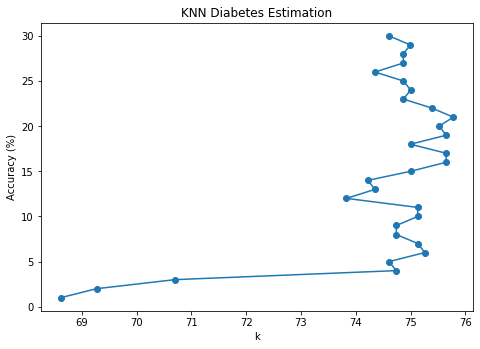

In [263]:
y = foldVal
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('KNN Diabetes Estimation')
ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('k')

plt.plot(y,x,'-o',label='curve2')